# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [21]:
vegetables = pd.read_csv('Kolkata_Brinjal.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2600,3000,2800,31-Dec-19
1,2,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,1800,2000,1800,27-Dec-19
2,3,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2400,2200,26-Dec-19
3,4,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,25-Dec-19
4,5,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,24-Dec-19


# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [22]:
vegetables = vegetables[vegetables['District Name'] == "Kolkata"]
vegetables = vegetables[vegetables['Market Name'] == "Sealdah Koley Market"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2600,3000,2800,31-Dec-19
1,2,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,1800,2000,1800,27-Dec-19
2,3,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2400,2200,26-Dec-19
3,4,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,25-Dec-19
4,5,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,24-Dec-19


In [23]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
9,10,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,19
8,9,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,20
7,8,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,21
6,7,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,22
5,6,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,23
4,5,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,24
3,4,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2200,2000,25
2,3,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2000,2400,2200,26
1,2,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,1800,2000,1800,27
0,1,Kolkata,Sealdah Koley Market,Brinjal,Other,FAQ,2600,3000,2800,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [24]:
climate = pd.read_csv('climate_Kolkata_Brinjal_120.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name           Market Name Commodity Variety Grade  \
0    354     355       Kolkata  Sealdah Koley Market   Brinjal   Other   FAQ   
1    353     354       Kolkata  Sealdah Koley Market   Brinjal   Other   FAQ   
2    352     353       Kolkata  Sealdah Koley Market   Brinjal   Other   FAQ   
3    351     352       Kolkata  Sealdah Koley Market   Brinjal   Other   FAQ   
4    350     351       Kolkata  Sealdah Koley Market   Brinjal   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     1800                     2000   
1                     1800                     2000   
2                     1800                     2000   
3                     2400                     2800   
4                     2200                     2600   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                       1800  ...  67.295000  63.758333  93.391667  74.395000   
1                       18

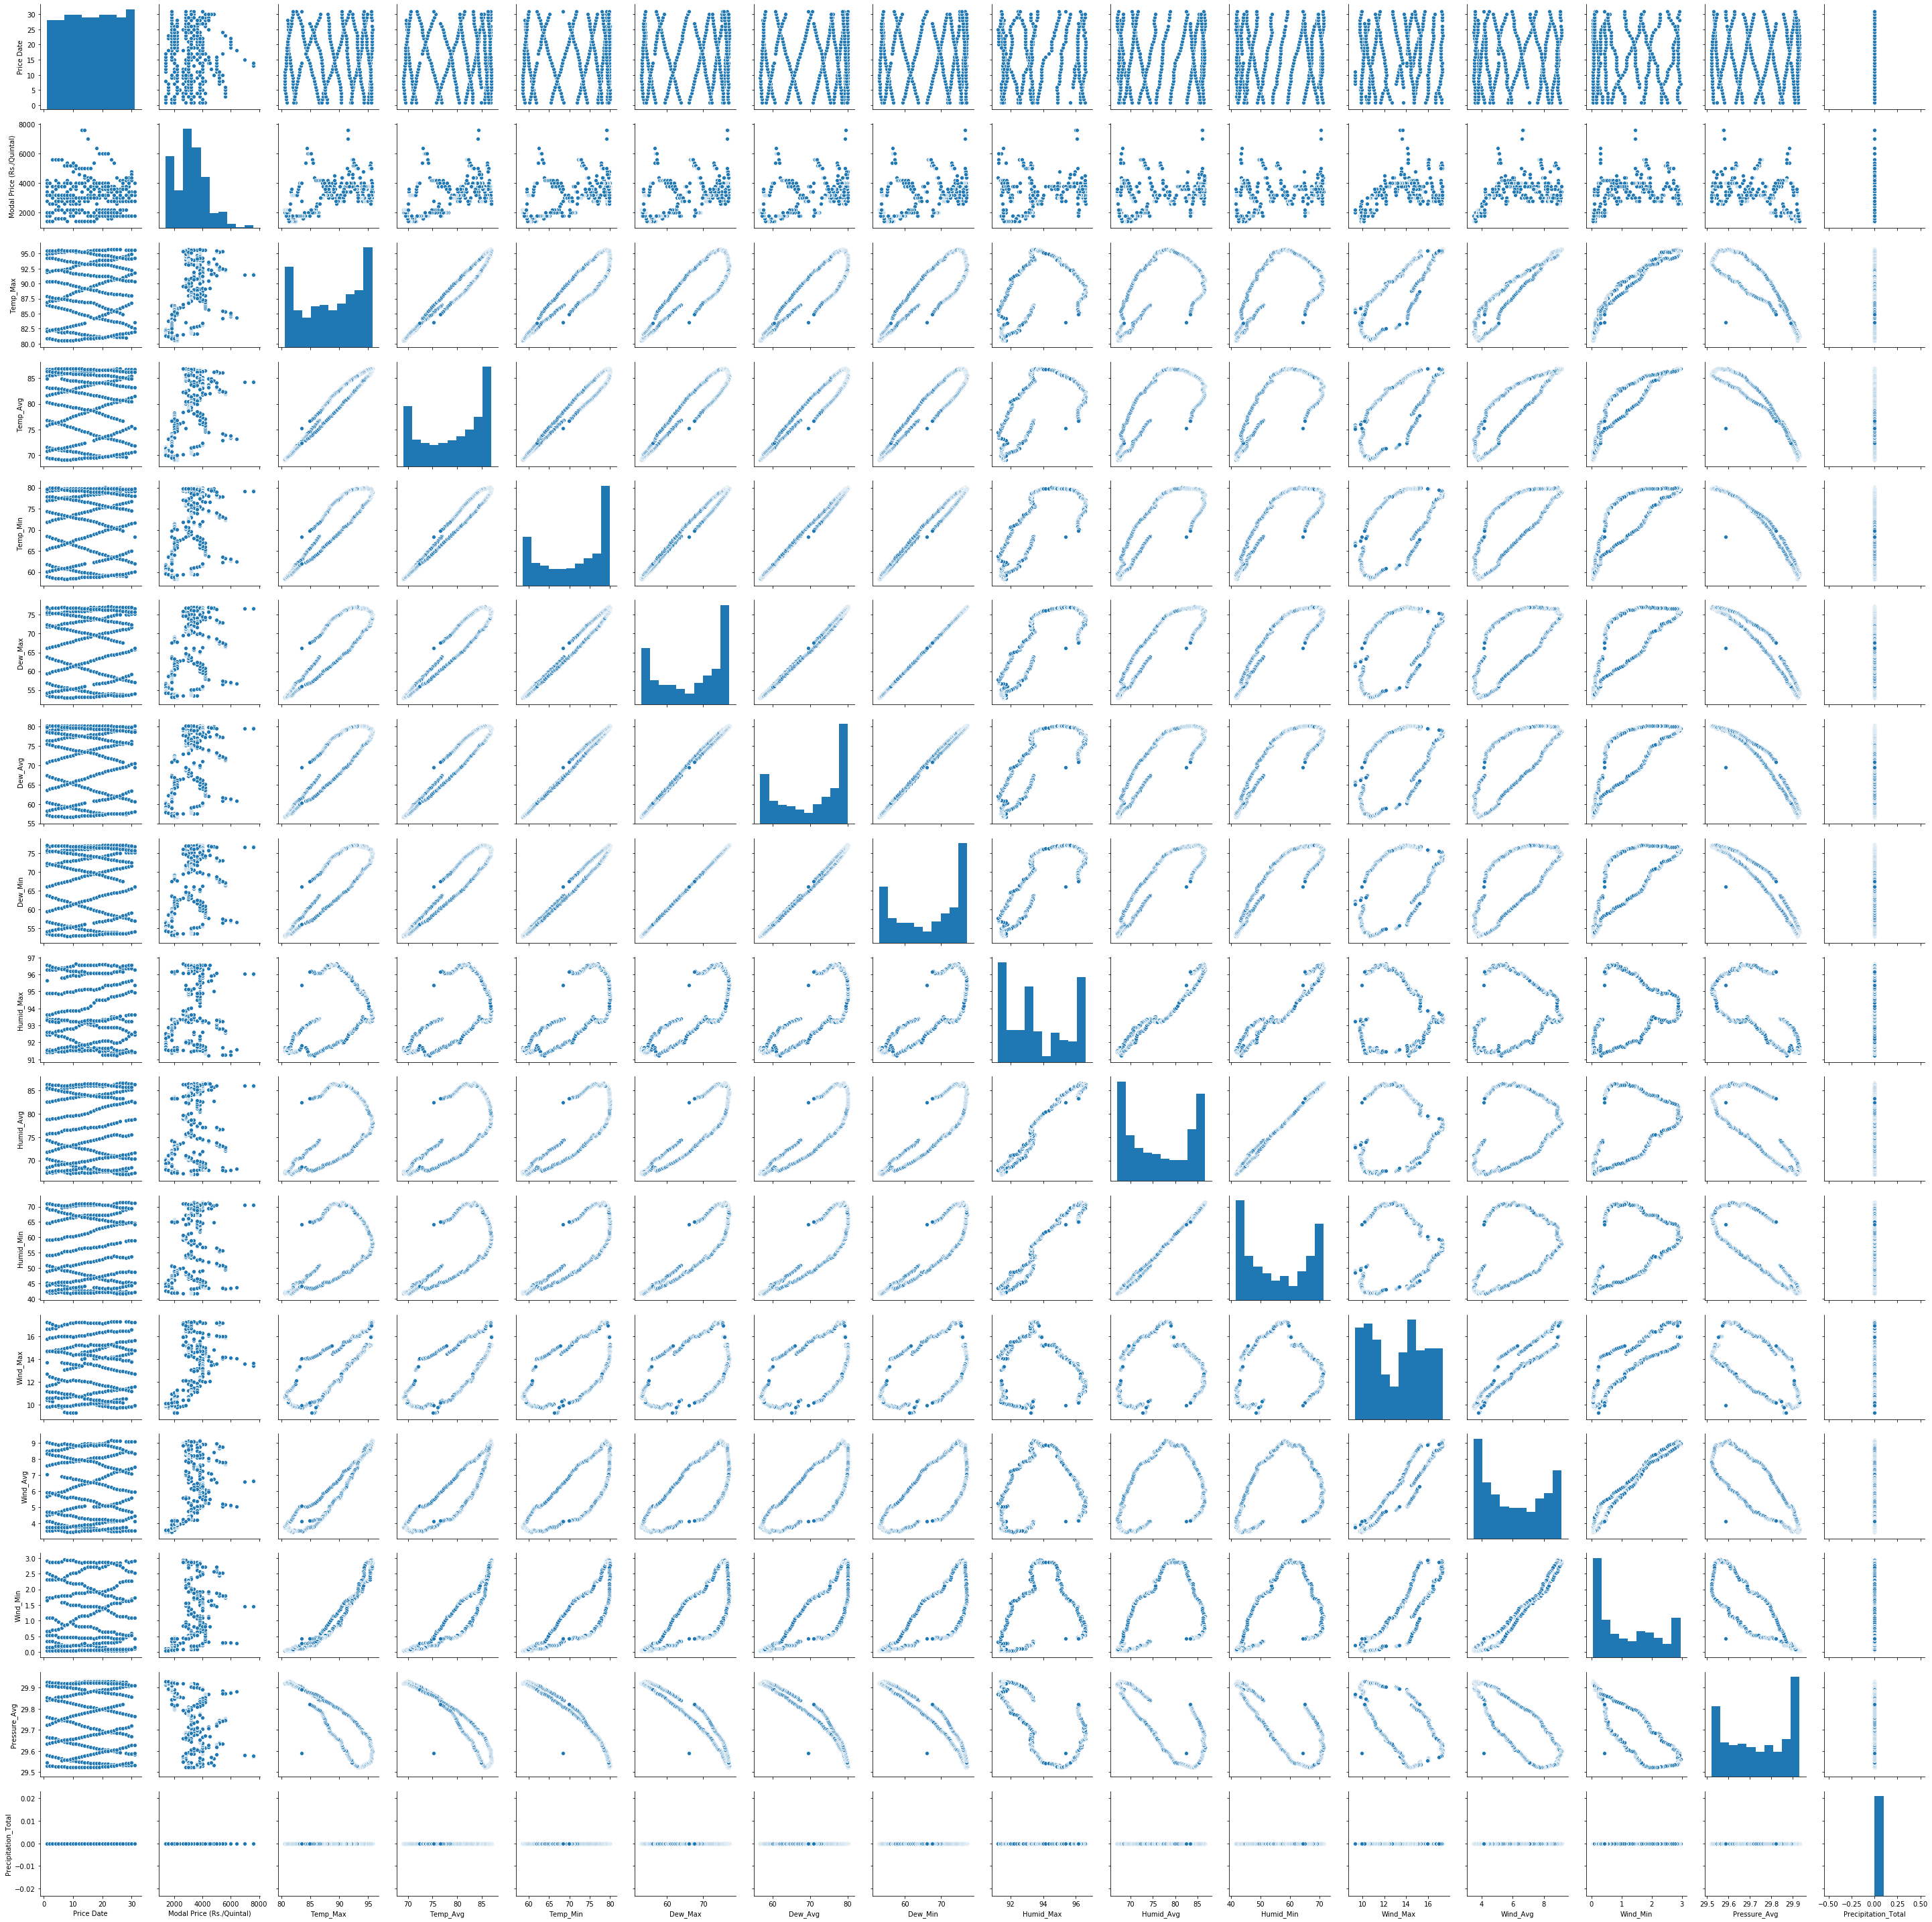

In [25]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [28]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 2000,max_depth=3000, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 21.825308561325073


In [29]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [30]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9767527660854713
0.890125144463304


# Feature Importance

In [31]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.07988451179171197
Temp_Max -> 0.02529932254303057
Temp_Avg -> 0.05437283729996261
Temp_Min -> 0.022265630302565172
Dew_Max -> 0.02072327175040552
Dew_Avg -> 0.0193860519626689
Dew_Min -> 0.02137046135600685
Humid_Max -> 0.054568559196984646
Humid_Avg -> 0.024445893770088913
Humid_Min -> 0.04338529368276855
Wind_Max -> 0.12773625560452448
Wind_Avg -> 0.4274216171927415
Wind_Min -> 0.03558887944640565
Pressure_Avg -> 0.04355141410013475
Precipitation_Total -> 0.0


# predicted vs Actual

In [32]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

2766.9->2600
1417.0->1400
4040.65->4000
3855.05->3000
2071.8->2000
4075.5->4000
2005.9->1800
2067.6->2200
3017.6->2800
3195.7->3200
2301.1->2200
3514.3->3800
2006.6->2000
3171.7->2800
4060.15->4000
3210.4->3200
3648.65->3600
3587.85->3800
3019.8->3000
3793.7->4000
3932.9->4000
2977.55->2800
3585.65->3800
1493.6->1400
5148.3->5200
5005.7->5000
5347.0->4600
3642.8->3600
1764.2->1800
2107.2->1800
2857.3->2800
2069.1->2200
2921.7->3000
3607.55->3400
3049.25->2800
1563.2->1800
1725.9->1600
4104.65->5000
3239.0->3200
3215.2->3200
2937.85->2800
1741.7->1800
3721.2->3800
3719.55->4800
2469.7->2000
3218.45->2800
1933.7->1800
2148.5->2200
1421.1->1400
3044.8->3000
4159.4->4800
3737.25->3800
3079.25->3000
2193.7->2200
3236.5->3200
3683.25->3800
2174.5->2600
4188.45->3000
2043.2->2200
3256.45->3200
2154.9->2200
1457.7->1400
4050.75->4000
2080.5->2200
2117.9->2000
3037.8->3400
2702.6->3000
4072.85->4200
3723.55->3800
3246.0->3200
4181.35->3200
1960.3->2200
3329.15->3400
2141.0->3000
3982.85->3200
2

In [33]:
print(sum_a/l)

221.0719626168225


# Create picke file

In [34]:
import pickle
filename = 'Kolkata_Brinjal'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [35]:
filename = 'Kolkata_Brinjal'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [36]:
print(sum/len(actual)) 

142.81183098591544
